# Data Exploration

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
DATA_DIR = 'Data/Transformed Data'

## Workout Data

In [10]:
csv_filepath = os.path.join(DATA_DIR, 'workout-routes_data.csv')
workout_data = pd.read_csv(csv_filepath,index_col=0,dtype={'workout_name':str,'datetime':str,'lon':float,'lat':float,'elev':float,'speed':float,'course':float,'hAcc':float,'vAcc':float},parse_dates=['datetime'])

/Users/jamesquirk/Google Drive/GitHub/Apple-Health-Analytics/venv/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [11]:
workout_data.describe(datetime_is_numeric=True)

,lon,lat,elev,speed,course,hAcc,vAcc
count,1.047720e+06,1.047720e+06,1.047720e+06,1.047720e+06,1.047720e+06,1.047720e+06,1.047720e+06
mean,-2.539162e+00,5.337958e+01,5.625812e+01,1.467397e+00,1.715185e+02,1.227984e+00,8.579443e-01
std,5.821116e-01,6.911534e-01,1.040465e+02,7.509873e-01,1.012377e+02,6.324807e-01,4.125702e-01
min,-4.487817e+00,4.110943e+01,-2.157237e+02,-1.000000e+00,-1.000000e+00,7.213350e-01,6.271890e-01
25%,-2.518754e+00,5.338076e+01,2.626340e+01,1.166732e+00,7.335658e+01,9.629550e-01,7.153780e-01
50%,-2.372132e+00,5.346509e+01,2.781366e+01,1.442897e+00,1.958456e+02,9.652820e-01,7.160065e-01
75%,-2.274067e+00,5.347450e+01,5.081267e+01,1.647838e+00,2.502924e+02,1.161316e+00,7.981900e-01
max,1.274690e+00,5.367704e+01,1.076889e+03,1.648554e+01,3.599979e+02,4.800725e+01,3.185339e+01


In [12]:
workout_data.dtypes

workout_name                 object
datetime        datetime64[ns, UTC]
lon                         float64
lat                         float64
elev                        float64
speed                       float64
course                      float64
hAcc                        float64
vAcc                        float64
dtype: object

In [24]:
workout_data['time'] = workout_data['datetime'].dt.time
workout_data['counter'] = 1
workout_data

,workout_name,datetime,lon,lat,elev,speed,course,hAcc,vAcc,time,counter
0,Route 2019-09-08 1:03pm,2019-09-08 11:41:20+00:00,-2.495944,53.381443,17.492167,3.882764,-1.000000,6.708380,5.473464,11:41:20,1
1,Route 2019-09-08 1:03pm,2019-09-08 11:41:21+00:00,-2.495890,53.381455,17.715006,3.882913,-1.000000,6.345994,5.202903,11:41:21,1
2,Route 2019-09-08 1:03pm,2019-09-08 11:41:22+00:00,-2.495834,53.381468,17.946207,3.883478,-1.000000,5.996423,4.939213,11:41:22,1
3,Route 2019-09-08 1:03pm,2019-09-08 11:41:23+00:00,-2.495779,53.381480,18.171635,3.884566,-1.000000,5.681995,4.699025,11:41:23,1
4,Route 2019-09-08 1:03pm,2019-09-08 11:41:24+00:00,-2.495724,53.381493,18.397200,3.886378,-1.000000,5.393605,4.475432,11:41:24,1
...,...,...,...,...,...,...,...,...,...,...,...
1047715,Route 2020-08-09 8:32pm,2020-08-09 19:32:21+00:00,-2.264007,53.472317,30.678410,0.493094,53.322544,4.788907,3.182303,19:32:21,1
1047716,Route 2020-08-09 8:32pm,2020-08-09 19:32:22+00:00,-2.264005,53.472321,30.817717,0.492463,49.154648,5.148884,3.427234,19:32:22,1
1047717,Route 2020-08-09 8:32pm,2020-08-09 19:32:23+00:00,-2.264002,53.472325,30.957335,0.492069,41.908752,5.531296,3.688258,19:32:23,1
1047718,Route 2020-08-09 8:32pm,2020-08-09 19:32:24+00:00,-2.263999,53.472329,31.097107,0.491878,50.186630,5.935503,3.965015,19:32:24,1


### What is my most active time of the day?



<AxesSubplot:xlabel='time'>

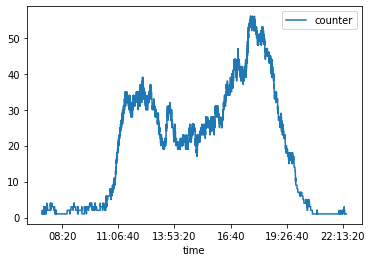

In [29]:
active_times = workout_data[['time','counter']].groupby(by='time').count()
active_times.plot()

As expected, my exercise is highest throughout the main hours of the day. Of this period, my most common time for exercising is mid afternoon, this would coincide with when I am finishing work.

## ECG Data

In [ ]:
csv_filepath